In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
auctions = pd.read_csv("data/auctions.csv.gzip", parse_dates=['date'])

In [3]:
dtypes_dict = {'advertiser_id':'category', 'action_id': np.float64, 'source_id': np.int8, 'created': str, \
                'country_code': np.int64, 'latitude': np.float64, 'longitude': np.float64, 'wifi_connection': bool, \
                'carrier_id': np.float16, 'os_minor': np.float32, 'os_major': np.float32, 'agent_device': np.float64, \
                'specs_brand': 'category', 'brand': np.float16, 'timeToClick': np.float64, 'touchX': np.float16, \
                'touchY': np.float16, 'ref_type': 'category', 'ref_hash': np.int64}

clicks = pd.read_csv('data/clicks.csv.gzip', dtype=dtypes_dict)

In [2]:
dtypes_dict = {'created':'str',  'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_language': 'category', \
                'application_id': 'category', 'ref_hash': 'category', 'kind': 'str', 'user_agent': 'str'}

installs = pd.read_csv('data/installs.csv.gzip', parse_dates=['created'], low_memory=False)
installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan

In [4]:
dtype_list = {'event_id':np.int16, 'ref_type':'category', 'aplication_id':np.int16, 'atributed':bool, \
              'device_countrycode':'category', 'trans_id':'category', 'device_os':'category', \
              'wifi':object, 'connection_type':'category'}

events = pd.read_csv('data/events.csv.gzip', parse_dates= ['date'], low_memory=False)

In [6]:
print(installs.columns)
print(events.columns)
print(auctions.columns)
print(clicks.columns)

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id', 'ip_address', 'device_language'],
      dtype='object')
Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')
Index(['auction_type_id', 'country', 'date', 'device_id', 'platform',
       'ref_type_id', 'source_id'],
      dtype='object')
Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major'

Solo voy a analizar el ref hash y device_id, asi que elimino todas las columnas que no necesite

In [7]:
installs.drop('ref_type', axis=1, inplace=True) 
installs.drop('device_countrycode', axis=1, inplace=True) 
installs.drop('kind', axis=1, inplace=True)
installs.drop('wifi', axis=1, inplace=True)
installs.drop('trans_id', axis=1, inplace=True)
installs.drop('device_language', axis=1, inplace=True)
installs.drop('session_user_agent', axis=1, inplace=True)
installs.drop('user_agent', axis=1, inplace=True)
installs.drop('event_uuid', axis=1, inplace=True)

In [9]:
clicks.drop('latitude', axis=1, inplace=True)
clicks.drop('longitude', axis=1, inplace=True)
clicks.drop('wifi_connection', axis=1, inplace=True)
clicks.drop('carrier_id', axis=1, inplace=True)
clicks.drop('trans_id', axis=1, inplace=True)
clicks.drop('os_minor', axis=1, inplace=True)
clicks.drop('os_major', axis=1, inplace=True)
clicks.drop('touchX', axis=1, inplace=True)
clicks.drop('touchY', axis=1, inplace=True)

In [10]:
events.drop('event_uuid', axis=1, inplace=True)
events.drop('device_countrycode', axis=1, inplace=True)
events.drop('device_os_version', axis=1, inplace=True)
events.drop('device_city', axis=1, inplace=True)
events.drop('trans_id', axis=1, inplace=True)
events.drop('session_user_agent', axis=1, inplace=True)
events.drop('wifi', axis=1, inplace=True)
events.drop('device_language', axis=1, inplace=True)
events.drop('user_agent', axis=1, inplace=True)

In [18]:
auctions.drop('country', axis=1, inplace=True)
auctions.drop('ref_type_id', axis=1, inplace=True)
auctions.drop('platform', axis=1, inplace=True)
auctions.drop('auction_type_id', axis=1, inplace=True)

In [12]:
installs.head()

,created,application_id,ref_hash,attributed,implicit,device_brand,device_model,ip_address
0,2019-03-13 01:43:33.445,0,8464844987297247076,False,False,3.083059e+17,4.445252e+18,5529284367937637301
1,2019-03-13 04:58:35.078,0,3250564871270161533,False,False,3.083059e+17,4.445252e+18,6098022721363533304
2,2019-03-13 04:20:57.666,0,7953318831018100268,False,True,5.137992e+17,6.026543e+18,4636407223847323867
3,2019-03-13 04:20:57.698,0,7953318831018100268,False,False,5.137992e+17,6.026543e+18,4636407223847323867
4,2019-03-10 22:24:56.684,0,8355110941557237501,False,True,1.083369e+18,7.876612e+18,685400811232710215


In [13]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_brand,device_model,carrier,kind,device_os,connection_type,ip_address
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,2.248157e+17,5.516623e+18,7.531669e+18,Cable/DSL,7858558567428669000
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,2.248157e+17,9.977660e+17,7.531669e+18,Cable/DSL,7858558567428669000
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,2.248157e+17,5.516623e+18,7.531669e+18,Cable/DSL,7858558567428669000
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,NaN,5.990117e+18,2.248157e+17,8.561153e+18,7.531669e+18,Cable/DSL,6324037615828123965
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,NaN,5.960896e+18,2.248157e+17,8.731902e+17,7.531669e+18,Cable/DSL,2894495631302821483


In [19]:
auctions.head()

,date,device_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,0
1,2019-03-11 14:18:34.440157,1115994996230693426,0
2,2019-03-11 14:18:35.862360,7463856250762200923,0
3,2019-03-11 14:18:36.167163,7829815350267792040,0
4,2019-03-11 14:18:37.728590,1448534231953777480,0


In [20]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,agent_device,specs_brand,brand,timeToClick,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,NaN,2733035977666442898,NaN,1.563,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,NaN,392184377613098015,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,NaN,392184377613098015,NaN,NaN,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,NaN,2733035977666442898,NaN,19.013,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,NaN,2733035977666442898,NaN,28.110,1891515180541284343,4368617728156436525


### **Correlacion entre cantidad de subastas y clicks**

In [21]:
# filtro los device_id de las subastas 
device_count = auctions['device_id'].value_counts()
subastas_x_device_key = device_count.keys()
subastas_x_device = device_count.to_frame().reset_index()
subastas_x_device.columns = ['ref_hash', 'count']
len(subastas_x_device)

206977

In [22]:
# busco a esos mismos device en el data de click ref_hash
ref_hash_count = clicks.loc[clicks['ref_hash'].isin(subastas_x_device_key)]\
                            ['ref_hash'].value_counts()
clicks_x_ref_hash_keys = ref_hash_count.keys()
clicks_x_ref_hash = ref_hash_count.to_frame().reset_index()
clicks_x_ref_hash.columns = ['ref_hash', 'count']
len(clicks_x_ref_hash)

16979

In [25]:
ref_hash_ck_au = pd.merge(subastas_x_device, clicks_x_ref_hash, on='ref_hash')
ref_hash_ck_au.head()

,ref_hash,count_x,count_y
0,633139769114048761,27762,10
1,7202276635029175071,23055,10
2,7298861376107043945,18188,12
3,5376802567578262905,16367,9
4,795159065504552200,12275,1


In [26]:
# como son muchos datos filtro por cantidad de clicks mayores a 15
more_clicks = list(ref_hash_ck_au.loc[ref_hash_ck_au['count_y'] >= 15]['ref_hash'].keys())
more_cliks_merge = ref_hash_ck_au.iloc[more_clicks].set_index('ref_hash')
more_cliks_merge.columns = ['count_auctions', 'count_clicks']
len(more_clicks)

12

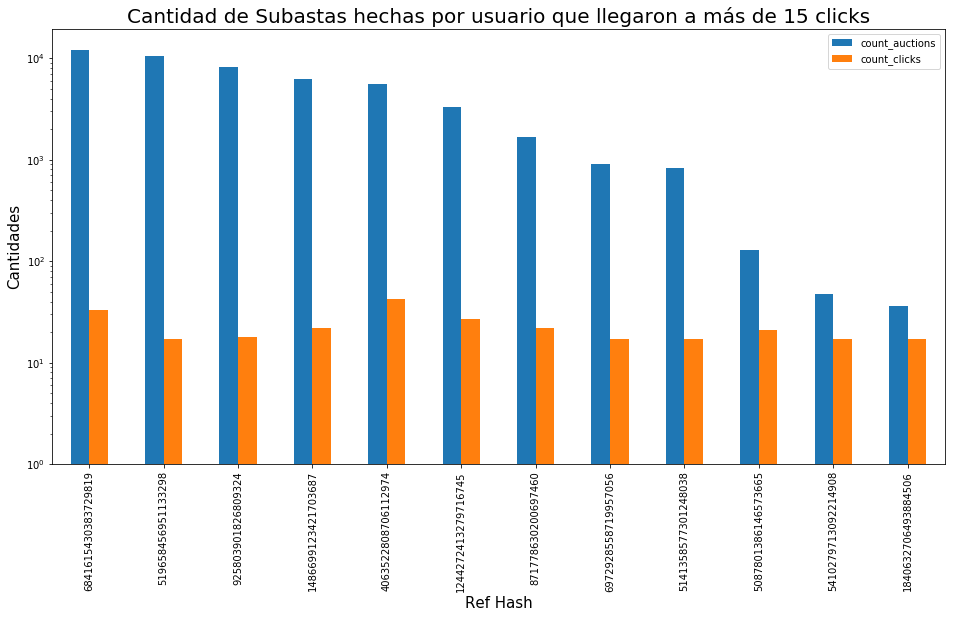

In [27]:
# grafico la relacion entre subastas y clicks
merge_cl_au = more_cliks_merge.plot(log=True, figsize=(16,8), kind='bar')
merge_cl_au.set_title('Cantidad de Subastas hechas por usuario que llegaron a más de 15 clicks', fontsize =20)
merge_cl_au.set_ylabel("Cantidades", fontsize = 15)
merge_cl_au.set_xlabel("Ref Hash", fontsize = 15)
plt.savefig('image/auctions_clicks_count.png',bbox_inches = 'tight', pad_inches = 0.1)

## **Correlacion entre cantidad de instalaciones y subastas**

In [28]:
inst_hash_count = installs['ref_hash'].value_counts()
inst_all = inst_hash_count.keys()
len(inst_all)

3008

In [32]:
inst_x_ref = inst_hash_count.to_frame().reset_index()
inst_x_ref.columns = ['ref_hash', 'count']

In [29]:
auc_device_count = auctions.loc[auctions['device_id'].isin(inst_all)]['device_id'].value_counts()
auc_device_keys = auc_device_count.keys()
auc_device = auc_device_count.to_frame().reset_index()
auc_device.columns = ['ref_hash', 'count']
len(auc_device)

994

In [33]:
merge_inst_auct = pd.merge(inst_x_ref, auc_device, on='ref_hash')
merge_inst_auct.head()

,ref_hash,count_x,count_y
0,2515049144505739996,3,236
1,5376622639905210608,3,54
2,470581161921490835,3,2
3,394181128078904930,3,253
4,6207088909238189318,3,7


In [35]:
more_installs_keys = list(merge_inst_auct.loc[merge_inst_auct['count_x'] > 2]['ref_hash'].keys())
more_installs = merge_inst_auct.iloc[more_installs_keys].set_index('ref_hash')
more_installs.columns = ['count_installs', 'count_auctions']
print(len(more_installs))

7


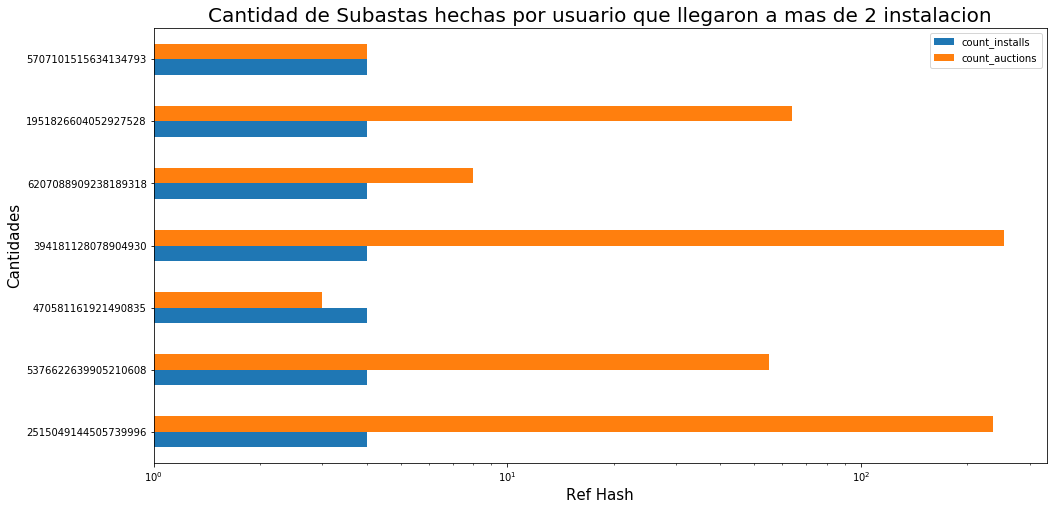

In [91]:
merge_in_au = more_installs.plot(log=True, figsize=(16,8), kind='barh')
merge_in_au.set_title('Cantidad de Subastas hechas por usuario que llegaron a mas de 2 instalacion', fontsize =20)
merge_in_au.set_ylabel("Cantidades", fontsize = 15)
merge_in_au.set_xlabel("Ref Hash", fontsize = 15)
plt.savefig('image/auctions_installs_count.png',bbox_inches = 'tight', pad_inches = 0.1)

## **Correlacion entre cantidad de eventos y subastas**

In [53]:
event_hash_count = events.loc[events['ref_hash'].isin(subastas_x_device_key)]\
                            ['ref_hash'].value_counts()
event_x_ref_hash_keys = event_hash_count.keys()
event_x_ref_hash = event_hash_count.to_frame().reset_index()
event_x_ref_hash.columns = ['ref_hash', 'count']
len(event_x_ref_hash)

84834

In [64]:
merge_auc_event = pd.merge(auc_device, event_x_ref_hash, on='ref_hash')
merge_auc_event.head()

,ref_hash,count_x,count_y
0,7318975191845022655,1868,1
1,2513037946116418236,1776,5
2,5321931871150834804,1569,11
3,4758714072957403924,1569,4
4,2875587197457827058,1287,1


In [79]:
more_events_keys = list(merge_auc_event.loc[merge_auc_event['count_y'] > 100]['ref_hash'].keys())
merge_auc_events = merge_auc_event.iloc[more_events_keys].set_index('ref_hash')
merge_auc_events.columns = ['count_auctions', 'count_events']
print(len(merge_auc_events))

8


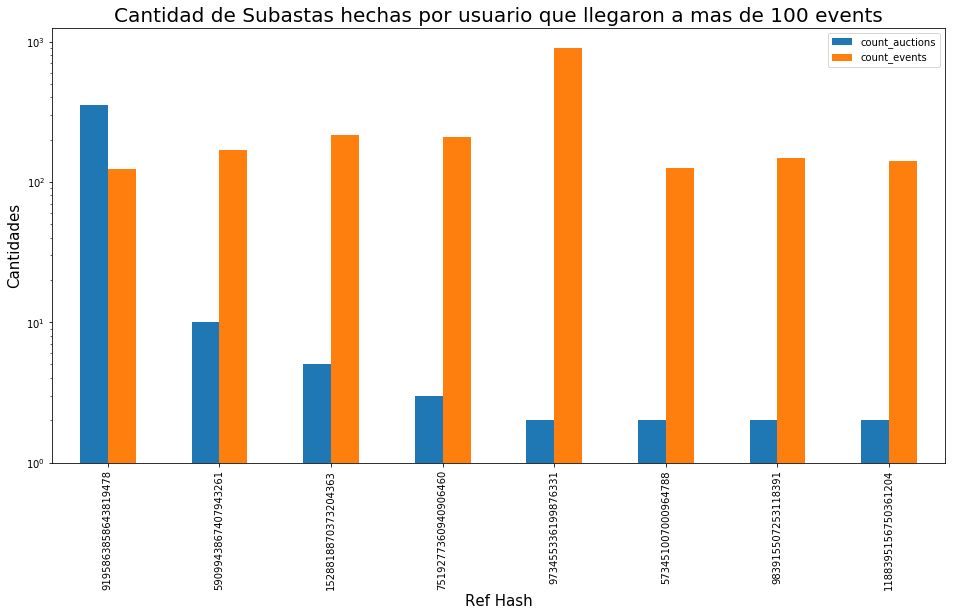

In [92]:
merge_ev_au = merge_auc_events.plot(log=True, figsize=(16,8), kind='bar')
merge_ev_au.set_title('Cantidad de Subastas hechas por usuario que llegaron a mas de 100 events', fontsize =20)
merge_ev_au.set_ylabel("Cantidades", fontsize = 15)
merge_ev_au.set_xlabel("Ref Hash", fontsize = 15)
plt.savefig('image/auctions_events_count.png',bbox_inches = 'tight', pad_inches = 0.1)

## **Correlacion entre clicks y installs**

In [37]:
clicks_hash_count = clicks.loc[clicks['ref_hash'].isin(inst_all)]['ref_hash'].value_counts()
clicks_x_ref_hash_keys = clicks_hash_count.keys()
clicks_x_ref_hash = clicks_hash_count.to_frame().reset_index()
clicks_x_ref_hash.columns = ['ref_hash', 'count']
len(clicks_x_ref_hash)

7

In [1]:
merge_inst_click = pd.merge(inst_x_ref, clicks_x_ref_hash, on='ref_hash').set_index('ref_hash')
merge_inst_click.columns = ['count_installs', 'count_clicks']
merge_inst_click.head()

NameError: name 'pd' is not defined

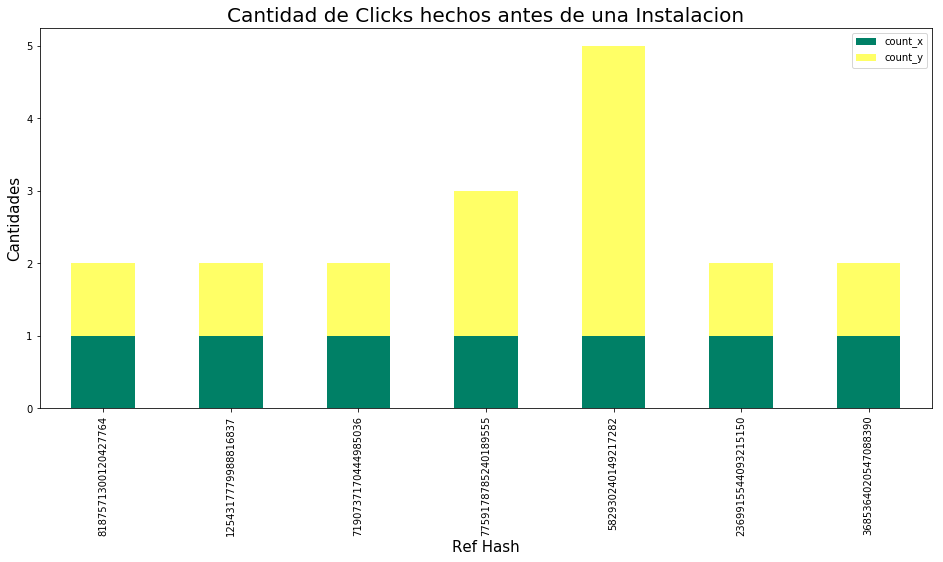

In [48]:
merge_fig = merge_inst_click.plot(figsize=(16,7), kind='bar',  cmap='summer', stacked=True)
merge_fig.set_title('Cantidad de Clicks hechos antes de una Instalacion', fontsize =20)
merge_fig.set_ylabel("Cantidades", fontsize = 15)
merge_fig.set_xlabel("Ref Hash", fontsize = 15)
plt.savefig('image/installs_clicks_count.png')